### Big Mart Sales Prediction

- [Big Mart Sales Prediction](https://datahack.analyticsvidhya.com/contest/big-mart-sales-prediction/#ProblemStatement)

In [130]:
import tensorflow as tf
from tensorflow.keras.layers import ReLU, Dense, Input
from tensorflow.keras.models import Model

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

### Read Data

In [132]:
folder_path = 'C:/Users/Home/Desktop/05_Fundamentals_of_deep_learning/'

train_data_path = folder_path + 'train.csv'
test_data_path = folder_path + 'test.csv'

In [133]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [134]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [135]:
print(f'Train data shape : {train_data.shape}')
print(f'Test data shape : {test_data.shape}')

Train data shape : (8523, 12)
Test data shape : (5681, 11)


In [136]:
# list all columns in train data
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [137]:
# check for missing values
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [138]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

## Data Preprocessing

### Filling Missing Values

In [139]:
print(f"Mean of Item Weight : {train_data['Item_Weight'].mean()}")
print(f"Median of Item Weight : {train_data['Item_Weight'].median()}")

Mean of Item Weight : 12.857645184135976
Median of Item Weight : 12.6


#### Continuous Values - Mean/Median

In [140]:
# Replace Nan values by mean/median for continuous variables

train_data['Item_Weight'] = train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())

In [141]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [142]:
test_data.fillna({'Item_Weight' : test_data['Item_Weight'].mean()}, inplace=True)

In [143]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Categorical Values - Mode

In [144]:
# Replace Nan values by mode for categorical variables
train_data['Outlet_Size'] = train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [145]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [146]:
test_data.fillna({'Outlet_Size' : test_data['Outlet_Size'].mode()[0]}, inplace=True)

In [147]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Converting Categorical Values to Numerical

In [148]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

#### Item_Fat_Content    

In [149]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].map({'Low Fat':0, 'Regular':1, 'low fat':0, 'LF':0,'reg':1})
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].map({'Low Fat':0, 'Regular':1, 'low fat':0, 'LF':0,'reg':1})

In [150]:
train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
0    5517
1    3006
Name: count, dtype: int64

In [151]:
test_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
0    3668
1    2013
Name: count, dtype: int64

#### Item type

In [152]:
Item_Type_dummies_train = pd.get_dummies(train_data['Item_Type'],dtype=float)
Item_Type_dummies_test = pd.get_dummies(test_data['Item_Type'],dtype=float)

In [153]:
Item_Type_dummies_train

,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [154]:
# concat dummies to original data
train_data = pd.concat([train_data, Item_Type_dummies_train],axis=1, )
test_data = pd.concat([test_data, Item_Type_dummies_test],axis=1)

In [155]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [156]:
# Drop Item_Type column 

train_data.drop(['Item_Type'], axis=1, inplace=True)
test_data.drop(['Item_Type'], axis=1, inplace=True)

In [157]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,FDW58,20.750000,0,0.007565,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,FDW14,8.300000,1,0.038428,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NCN55,14.600000,0,0.099575,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,FDQ58,7.315000,0,0.015388,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,FDY38,12.695633,1,0.118599,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Outlet_Size

In [158]:
train_data['Outlet_Size'] = train_data['Outlet_Size'].map({'Small':0, 'Medium':1, 'High':2})

In [159]:
test_data['Outlet_Size'] = test_data['Outlet_Size'].map({'Small':0, 'Medium':1, 'High':2})

#### Outlet_Location_Type    

In [160]:
train_data['Outlet_Location_Type'] = train_data['Outlet_Location_Type'].map({'Tier 1':1, 'Tier 2':2, 'Tier 3':3})

In [161]:
test_data['Outlet_Location_Type'] = test_data['Outlet_Location_Type'].map({'Tier 1':1, 'Tier 2':2, 'Tier 3':3})

#### Outlet_Type       

In [162]:
train_data['Outlet_Type'] = train_data['Outlet_Type'].map({'Supermarket Type1':1, 'Supermarket Type2':2, 
                                                           'Grocery Store':4, 'Supermarket Type3':3})

In [163]:
test_data['Outlet_Type'] = test_data['Outlet_Type'].map({'Supermarket Type1':1, 'Supermarket Type2':2, 
                                                           'Grocery Store':4, 'Supermarket Type3':3})

In [164]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
Baking Goods                 float64
Breads                       float64
Breakfast                    float64
Canned                       float64
Dairy                        float64
Frozen Foods                 float64
Fruits and Vegetables        float64
Hard Drinks                  float64
Health and Hygiene           float64
Household                    float64
Meat                         float64
Others                       float64
Seafood                      float64
Snack Foods                  float64
Soft Drinks                  float64
Starchy Foods                float64
d

In [165]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Baking Goods                 float64
Breads                       float64
Breakfast                    float64
Canned                       float64
Dairy                        float64
Frozen Foods                 float64
Fruits and Vegetables        float64
Hard Drinks                  float64
Health and Hygiene           float64
Household                    float64
Meat                         float64
Others                       float64
Seafood                      float64
Snack Foods                  float64
Soft Drinks                  float64
Starchy Foods                float64
dtype: object

In [166]:
train_data_1 = train_data

In [167]:
# Drop unnecessary categorical columns 
train_data.drop(['Outlet_Establishment_Year','Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)
test_data.drop(['Outlet_Establishment_Year','Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)

In [168]:
train_data.dtypes

Item_Weight              float64
Item_Fat_Content           int64
Item_Visibility          float64
Item_MRP                 float64
Outlet_Size                int64
Outlet_Location_Type       int64
Outlet_Type                int64
Item_Outlet_Sales        float64
Baking Goods             float64
Breads                   float64
Breakfast                float64
Canned                   float64
Dairy                    float64
Frozen Foods             float64
Fruits and Vegetables    float64
Hard Drinks              float64
Health and Hygiene       float64
Household                float64
Meat                     float64
Others                   float64
Seafood                  float64
Snack Foods              float64
Soft Drinks              float64
Starchy Foods            float64
dtype: object

### Bringing all the variables in range 0 to 1

In [169]:
train_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Baking Goods', 'Breads', 'Breakfast', 'Canned',
       'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
      dtype='object')

In [170]:
train_data[['Item_Weight', 'Item_MRP']]

,Item_Weight,Item_MRP
0,9.300,249.8092
1,5.920,48.2692
2,17.500,141.6180
3,19.200,182.0950
4,8.930,53.8614
...,...,...
8518,6.865,214.5218
8519,8.380,108.1570
8520,10.600,85.1224
8521,7.210,103.1332


In [171]:
# applying for loop to bring all the variables in range 0 to 1
# converting item_weights and item_mrp in range (0,1)

for i in train_data[['Item_Weight', 'Item_MRP']]:
    train_data[i] = (train_data[i] - train_data[i].min()) / (train_data[i].max() - train_data[i].min())

In [172]:
for i in train_data[['Item_Weight', 'Item_MRP']]:
    test_data[i] = (test_data[i] - test_data[i].min()) / (test_data[i].max() - test_data[i].min())

In [173]:
# for i in test_data.columns[:-1]:
#     test_data[i] = (test_data[i] - test_data[i].min()) / (test_data[i].max() - test_data[i].min())

train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Baking Goods,Breads,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0.282525,0,0.016047,0.927507,1,1,1,3735.1380,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.081274,1,0.019278,0.072068,1,3,2,443.4228,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.770765,0,0.016760,0.468288,1,1,1,2097.2700,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.871986,1,0.000000,0.640093,1,3,4,732.3800,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0,0.000000,0.095805,2,3,1,994.7052,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Write preprocessed data to csv

In [174]:
# saving the pre-processed data
train_data.to_csv('big_mart_sales_train_data.csv', index=False)

In [175]:
# saving the pre-processed data
test_data.to_csv('big_mart_sales_test_data.csv', index=False)

### Split Data To X and Y

In [176]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = train_data.drop('Item_Outlet_Sales', axis=1)

# storing the dependent variable as y
y = train_data['Item_Outlet_Sales']

In [177]:
# shape of independent and dependent variables
X.shape, y.shape

((8523, 23), (8523,))

### Train and Val

In [178]:
# Creating training and validation set

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=10, test_size=0.3)

### Defining the architecture of the model

In [179]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense 

In [180]:
# number of input neurons
X_train.shape

(5966, 23)

In [181]:
# number of features in the data
X_train.shape[1]

23

In [182]:
# defining input neurons
input_neurons = X_train.shape[1]

In [186]:
# define number of output neurons
output_neurons = 1

In [187]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 30
neuron_hidden_layer_2 = 40
neuron_hidden_layer_3 = 20
neuron_hidden_layer_4 = 10

In [188]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_4, activation='relu'))
model.add(Dense(units=output_neurons, activation='linear'))

In [189]:
# summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                720       
                                                                 
 dense_5 (Dense)             (None, 40)                1240      
                                                                 
 dense_6 (Dense)             (None, 20)                820       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3001 (11.72 KB)
Trainable params: 3001 (11.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile model

In [190]:
from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [189]:
# rmse = tf.keras.metrics.RootMeanSquaredError()
# model.compile(loss='mean_squared_error',optimizer='Adam',metrics=[rmse,'mae'])

In [191]:
rmse = tf.keras.metrics.RootMeanSquaredError()
model.compile(loss='mean_squared_error',optimizer='Adam',metrics=['mae','mape'])

### Train Model

In [192]:
model_history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=250)

Epoch 1/250
187/187 [==============================] - 3s 6ms/step - loss: 6055830.5000 - mae: 1870.7112 - mape: 124.9459 - val_loss: 3086967.2500 - val_mae: 1373.0826 - val_mape: 242.9126
Epoch 2/250
187/187 [==============================] - 1s 4ms/step - loss: 2853788.0000 - mae: 1313.8143 - mape: 214.9780 - val_loss: 2724736.5000 - val_mae: 1285.7483 - val_mape: 209.5802
Epoch 3/250
187/187 [==============================] - 1s 4ms/step - loss: 2527749.2500 - mae: 1239.7430 - mape: 189.6868 - val_loss: 2381097.7500 - val_mae: 1213.5308 - val_mape: 188.1658
Epoch 4/250
187/187 [==============================] - 1s 4ms/step - loss: 2218351.2500 - mae: 1151.9396 - mape: 161.0538 - val_loss: 2085831.7500 - val_mae: 1118.0421 - val_mape: 153.2598
Epoch 5/250
187/187 [==============================] - 1s 4ms/step - loss: 1995876.1250 - mae: 1083.4172 - mape: 138.7304 - val_loss: 1923747.3750 - val_mae: 1033.3141 - val_mape: 120.4990
Epoch 6/250
187/187 [==============================] - 

Epoch 45/250
187/187 [==============================] - 1s 4ms/step - loss: 1197124.8750 - mae: 784.3774 - mape: 59.9899 - val_loss: 1215238.5000 - val_mae: 790.1375 - val_mape: 62.1361
Epoch 46/250
187/187 [==============================] - 1s 4ms/step - loss: 1193407.7500 - mae: 780.6647 - mape: 59.3906 - val_loss: 1212450.7500 - val_mae: 789.4788 - val_mape: 62.0238
Epoch 47/250
187/187 [==============================] - 1s 4ms/step - loss: 1189349.8750 - mae: 782.4258 - mape: 59.7811 - val_loss: 1210499.0000 - val_mae: 785.5876 - val_mape: 59.8500
Epoch 48/250
187/187 [==============================] - 1s 4ms/step - loss: 1203651.8750 - mae: 787.8507 - mape: 59.6291 - val_loss: 1234710.1250 - val_mae: 803.6176 - val_mape: 66.1967
Epoch 49/250
187/187 [==============================] - 1s 4ms/step - loss: 1194334.8750 - mae: 781.8594 - mape: 59.8721 - val_loss: 1229931.6250 - val_mae: 800.7535 - val_mape: 65.6157
Epoch 50/250
187/187 [==============================] - 1s 4ms/step - 

187/187 [==============================] - 1s 5ms/step - loss: 1153775.1250 - mae: 764.6662 - mape: 56.9651 - val_loss: 1181448.0000 - val_mae: 776.7869 - val_mape: 60.4080
Epoch 90/250
187/187 [==============================] - 1s 5ms/step - loss: 1150729.7500 - mae: 762.5789 - mape: 56.8226 - val_loss: 1183987.0000 - val_mae: 778.8208 - val_mape: 61.1930
Epoch 91/250
187/187 [==============================] - 1s 4ms/step - loss: 1152446.7500 - mae: 763.2762 - mape: 56.7498 - val_loss: 1191210.6250 - val_mae: 773.1059 - val_mape: 55.9559
Epoch 92/250
187/187 [==============================] - 1s 4ms/step - loss: 1147890.5000 - mae: 763.3298 - mape: 56.4174 - val_loss: 1199563.0000 - val_mae: 784.5770 - val_mape: 62.2598
Epoch 93/250
187/187 [==============================] - 1s 4ms/step - loss: 1152304.1250 - mae: 763.9324 - mape: 56.4206 - val_loss: 1271394.7500 - val_mae: 821.5124 - val_mape: 68.5368
Epoch 94/250
187/187 [==============================] - 1s 4ms/step - loss: 1156623

Epoch 133/250
187/187 [==============================] - 1s 4ms/step - loss: 1140780.3750 - mae: 755.9304 - mape: 56.1873 - val_loss: 1193091.0000 - val_mae: 783.3008 - val_mape: 64.1157
Epoch 134/250
187/187 [==============================] - 1s 4ms/step - loss: 1138527.2500 - mae: 755.4045 - mape: 56.1922 - val_loss: 1178853.5000 - val_mae: 772.6320 - val_mape: 60.3957
Epoch 135/250
187/187 [==============================] - 1s 4ms/step - loss: 1139703.7500 - mae: 757.1785 - mape: 56.4525 - val_loss: 1181109.7500 - val_mae: 772.0894 - val_mape: 59.9539
Epoch 136/250
187/187 [==============================] - 1s 4ms/step - loss: 1141185.7500 - mae: 756.3447 - mape: 56.1263 - val_loss: 1177980.5000 - val_mae: 770.6113 - val_mape: 58.9257
Epoch 137/250
187/187 [==============================] - 1s 4ms/step - loss: 1141955.1250 - mae: 759.7518 - mape: 57.1319 - val_loss: 1175176.5000 - val_mae: 771.2184 - val_mape: 60.0405
Epoch 138/250
187/187 [==============================] - 1s 4ms/s

Epoch 177/250
187/187 [==============================] - 1s 5ms/step - loss: 1115323.1250 - mae: 744.1054 - mape: 57.2505 - val_loss: 1185574.5000 - val_mae: 768.3512 - val_mape: 62.6856
Epoch 178/250
187/187 [==============================] - 1s 5ms/step - loss: 1118674.1250 - mae: 743.1514 - mape: 56.7138 - val_loss: 1169278.7500 - val_mae: 761.0099 - val_mape: 59.3188
Epoch 179/250
187/187 [==============================] - 1s 4ms/step - loss: 1118922.6250 - mae: 744.7150 - mape: 57.3345 - val_loss: 1174645.8750 - val_mae: 760.0880 - val_mape: 58.6899
Epoch 180/250
187/187 [==============================] - 1s 4ms/step - loss: 1115592.3750 - mae: 741.0920 - mape: 56.6589 - val_loss: 1185296.2500 - val_mae: 765.6458 - val_mape: 61.0934
Epoch 181/250
187/187 [==============================] - 1s 4ms/step - loss: 1115555.0000 - mae: 742.7478 - mape: 56.8884 - val_loss: 1174008.6250 - val_mae: 761.4144 - val_mape: 59.5229
Epoch 182/250
187/187 [==============================] - 1s 5ms/s

Epoch 221/250
187/187 [==============================] - 1s 4ms/step - loss: 1106781.2500 - mae: 739.8304 - mape: 56.3578 - val_loss: 1210942.0000 - val_mae: 766.6454 - val_mape: 55.3669
Epoch 222/250
187/187 [==============================] - 1s 4ms/step - loss: 1110390.0000 - mae: 740.1060 - mape: 56.2156 - val_loss: 1198928.1250 - val_mae: 775.1182 - val_mape: 63.7581
Epoch 223/250
187/187 [==============================] - 1s 5ms/step - loss: 1113175.7500 - mae: 741.4333 - mape: 56.6930 - val_loss: 1187696.8750 - val_mae: 762.2604 - val_mape: 56.3502
Epoch 224/250
187/187 [==============================] - 1s 5ms/step - loss: 1113725.5000 - mae: 740.5822 - mape: 56.2451 - val_loss: 1184515.7500 - val_mae: 764.6162 - val_mape: 60.8311
Epoch 225/250
187/187 [==============================] - 1s 5ms/step - loss: 1108628.1250 - mae: 738.5665 - mape: 56.3529 - val_loss: 1175486.6250 - val_mae: 760.1310 - val_mape: 58.0856
Epoch 226/250
187/187 [==============================] - 1s 4ms/s

### Evaluation

In [193]:
# getting predictions for the validation set
prediction = model.predict(test_data)
print(prediction.max(),prediction.min())
prediction

178/178 [==============================] - 1s 2ms/step
7209.25 162.6602


array([[1633.6901 ],
       [1288.5897 ],
       [ 482.12875],
       ...,
       [1772.703  ],
       [3554.4116 ],
       [1284.8099 ]], dtype=float32)

In [193]:
### Visualization

In [194]:
def plots(model_history):
  plt.plot(model_history.history['loss'])
  plt.plot(model_history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  # summarize history for accuracy
  plt.plot(model_history.history['mape'])
  plt.plot(model_history.history['val_mape'])
  plt.title('model mape')
  plt.ylabel('mape')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  # summarize history for accuracy
  plt.plot(model_history.history['mae'])
  plt.plot(model_history.history['val_mae'])
  plt.title('model mae')
  plt.ylabel('mae')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()


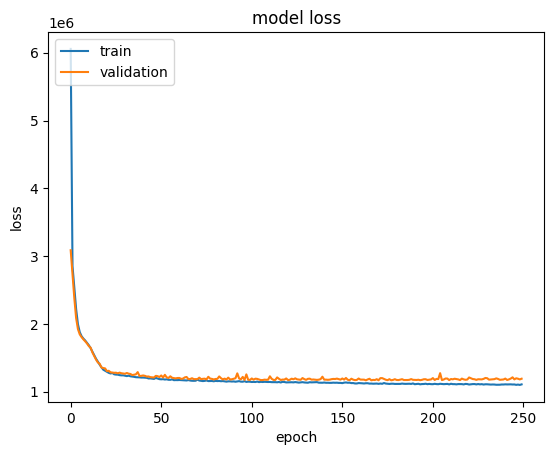

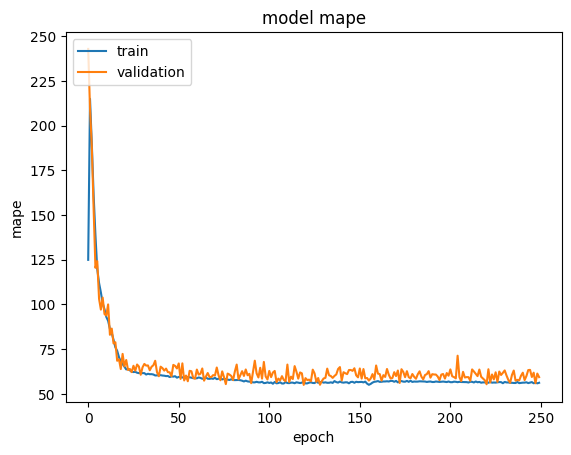

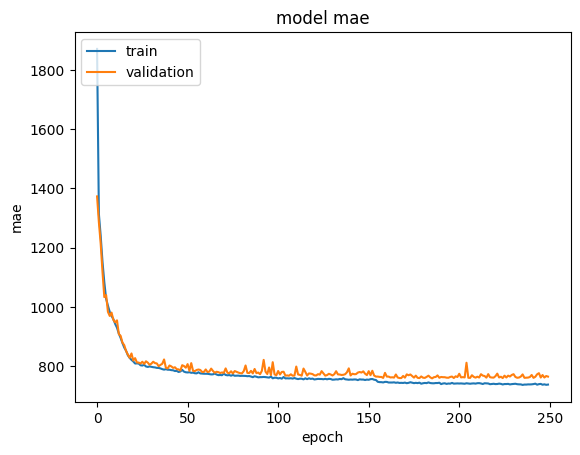

In [195]:
plots(model_history)

### Solution 

In [197]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [198]:
df_solution=test_data[['Item_Identifier','Outlet_Identifier']]
df_solution["Item_Outlet_Sales"]=prediction
df_solution

C:\Users\Home\AppData\Local\Temp\ipykernel_24964\4107708513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_solution["Item_Outlet_Sales"]=prediction


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1633.690063
1,FDW14,OUT017,1288.589722
2,NCN55,OUT010,482.128754
3,FDQ58,OUT017,2570.656250
4,FDY38,OUT027,5555.869141
...,...,...,...
5676,FDB58,OUT046,2354.718994
5677,FDD47,OUT018,2564.879395
5678,NCO17,OUT045,1772.703003
5679,FDJ26,OUT017,3554.411621


In [199]:
df_solution.to_csv('solution.csv', index=False)